### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".


In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import dataset
df = pd.read_csv('H:/ExcelR Data Science/datasets_BA/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [6]:
# Using np.where() to create new column
# label persons having taxable income<=30000 Risky else Non Risky

df['Fraudcheck']=np.where(df['Taxable.Income']<=30000,'Risky','Not Risky')

In [7]:
# checking if the new column was added
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Not Risky
1,YES,Divorced,33700,134075,18,YES,Not Risky
2,NO,Married,36925,160205,30,YES,Not Risky
3,YES,Single,50190,193264,15,YES,Not Risky
4,NO,Married,81002,27533,28,NO,Not Risky


In [8]:
# Checking the output column distribution
df['Fraudcheck'].value_counts()

Not Risky    476
Risky        124
Name: Fraudcheck, dtype: int64

In [9]:
r1=(df['Fraudcheck']=='Risky').sum()
r2=(df['Fraudcheck']=='Not Risky').sum()
print("Percent of data labelled as Risky is:",(r1/len(df)*100))
print("Percent of data labelled as Not Risky is:",(r2/len(df)*100))

Percent of data labelled as Risky is: 20.666666666666668
Percent of data labelled as Not Risky is: 79.33333333333333


In [10]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraudcheck'],
      dtype='object')

In [11]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

cols=['Undergrad','Marital.Status','Urban','Fraudcheck']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df[col]=le.fit_transform(df[col])
    print(le.classes_)

['NO' 'YES']
['Divorced' 'Married' 'Single']
['NO' 'YES']
['Not Risky' 'Risky']


In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


## Building  Random Forest base model and evaluating its performance using cross validation score

In [13]:
arr=df.values
x=arr[:,:-1]
y=arr[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=45)

In [15]:
# define the model
# Using 100 trees and max_features=3
rfc1 = RandomForestClassifier(n_estimators=100,max_features=4)

In [16]:
# Evaluate the base model(without hypertuning)

cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(rfc1, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Accuracy is:",np.mean(result))

Accuracy is: 0.9976190476190476


In [17]:
# Iterating over a range of folds in StratifiedKFold

from sklearn.model_selection import GridSearchCV

mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(rfc1, x_train, y_train, scoring='accuracy', cv=cv2, error_score='raise')
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)
    


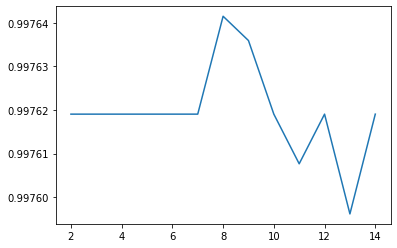

In [18]:
## Visualizing the scores generated for each number of folds

import seaborn as sns
sns.lineplot(x=n_folds,y=mean_accuracy)

## Fitting the model and finding important features

In [19]:
rfc1.fit(x_train,y_train)
rfc1.feature_importances_

array([2.31485057e-04, 1.21541039e-03, 9.87806473e-01, 7.22801217e-03,
       2.92707827e-03, 5.91541548e-04])

In [20]:
cols=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban']
feature_imp=pd.Series(rfc1.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Taxable.Income     0.987806
City.Population    0.007228
Work.Experience    0.002927
Marital.Status     0.001215
Urban              0.000592
Undergrad          0.000231
dtype: float64

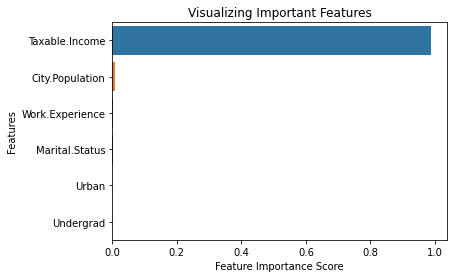

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


As the output column(Fraudcheck) was built solely from Taxable.Income column, only this column has the maximum importance as shown above.

In [22]:
# Prediction and accuracy score calculation
pred1 = rfc1.predict(x_test)

from sklearn.metrics import classification_report
target_names=['0-Not Risky', '1-Risky']
print(classification_report(y_test, pred1,target_names=target_names))

              precision    recall  f1-score   support

 0-Not Risky       1.00      1.00      1.00       148
     1-Risky       1.00      1.00      1.00        32

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, pred1)
conf_matrix1

array([[148,   0],
       [  0,  32]], dtype=int64)

## Hypertuning using RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV

cv3 = StratifiedKFold(n_splits=3,shuffle=True)

random_grid = {'n_estimators': [x for x in range(50,200,10)],
               'max_features': [x for x in range(3,6)],
               'max_depth': [x for x in range(2,10)],
               'min_samples_split':[x for x in range(5,50,5)],
               'min_samples_leaf': [x for x in range(2,10)]}
                                    
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_cv = RandomizedSearchCV(estimator = rfc1, param_distributions = random_grid, n_iter = 100,
                               cv = cv3,scoring='accuracy', verbose=2, random_state=42, n_jobs = -1)  
                                    
# fitting the model for random grid search 
random_cv.fit(x_train, y_train) 

                              

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   10.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(max_features=4), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'max_features': [3, 4, 5],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190]},
                   random_state=42, scoring='accurac

In [25]:
# Finding best parameter after tuning 

print("Best score for RandomSearchCV is:",random_cv.best_score_)
print("Optimal parameters for RandomSearchCV is:",random_cv.best_params_)  

Best score for RandomSearchCV is: 0.9976190476190476
Optimal parameters for RandomSearchCV is: {'n_estimators': 190, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 3, 'max_depth': 9}


In [26]:
## storing the best parameters in a variable
## fitting the model with best parameters

d= random_cv.best_params_

rfc2= RandomForestClassifier(n_estimators=d['n_estimators'], min_samples_split=d['min_samples_split'],
                             min_samples_leaf=d['min_samples_leaf'],max_features=d['max_features'],
                             max_depth=d['max_depth'])

rfc2.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features=3, min_samples_leaf=9,
                       min_samples_split=10, n_estimators=190)

In [27]:
# Prediction and accuracy score calculation

pred2 = rfc2.predict(x_test)
target_names=['0-Not Risky', '1-Risky']

print(classification_report(y_test, pred2,target_names=target_names,zero_division=1))

              precision    recall  f1-score   support

 0-Not Risky       1.00      1.00      1.00       148
     1-Risky       1.00      1.00      1.00        32

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [28]:
conf_matrix2=confusion_matrix(y_test,pred2)
conf_matrix2

array([[148,   0],
       [  0,  32]], dtype=int64)

## Plotting Confusion Matrices

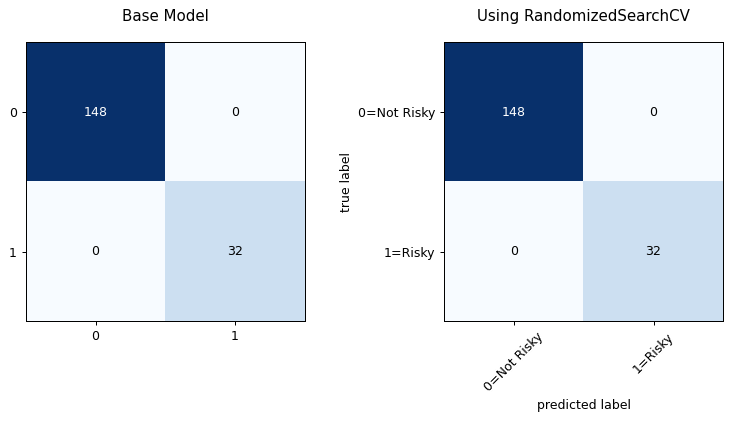

In [29]:
from mlxtend.plotting import plot_confusion_matrix

fig, axis= plt.subplots(1,2, figsize=(10,5),dpi=90)
class_names = ['0=Not Risky', '1=Risky']


fig, ax= plot_confusion_matrix(conf_mat=conf_matrix1,axis=axis[0],class_names=class_names,colorbar=False,show_absolute=True,show_normed=False)
axis[0].set_title('Base Model')

fig,ax= plot_confusion_matrix(conf_mat=conf_matrix2,axis=axis[1],class_names=class_names,colorbar=False,show_absolute=True,show_normed=False)
axis[1].set_title('Using RandomizedSearchCV')

plt.subplots_adjust(wspace=0.5)
plt.show()

+ The confusion matrices show that all the labels were correctly predicted.


+ As the output column was built from Taxable Income column ,the model accurately predicted all the labels .So base model performed equally well as the hypertuned model.
